In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as pl
import numpy as np
from numpy import array
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
print(pd.__version__) # version 0.23.4
print(sk.__version__) # version 0.20.1

0.23.4
0.20.1


In [2]:
df = pd.read_csv('data/data_inter.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,ANO,MES,ORIGEM,DESTINO,PASSAGEIROS
0,2014,3,CENTRO-OESTE,AMÉRICA DO SUL,1317.0
1,2014,6,SUL,ÁFRICA,0.0
2,2015,2,SUL,AMÉRICA DO SUL,29984.0
3,2007,1,SUL,AMÉRICA DO SUL,17340.0
4,2002,10,CENTRO-OESTE,AMÉRICA DO SUL,0.0


#### Dados estatísticos

In [3]:
df.describe()

,ANO,MES,PASSAGEIROS
count,6480.000000,6480.000000,6480.000000
mean,2008.500000,6.500000,18717.676852
std,5.188528,3.452319,49145.821373
min,2000.000000,1.000000,0.000000
25%,2004.000000,3.750000,0.000000
50%,2008.500000,6.500000,482.500000
75%,2013.000000,9.250000,6877.250000
max,2017.000000,12.000000,341031.000000


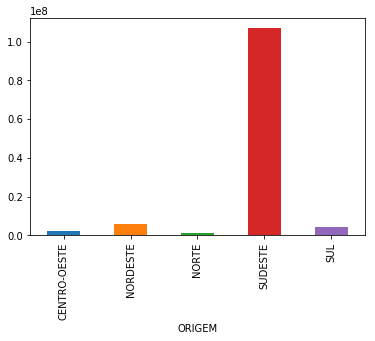

In [4]:
df.groupby(['ORIGEM'])['PASSAGEIROS'].sum().plot(kind='bar')

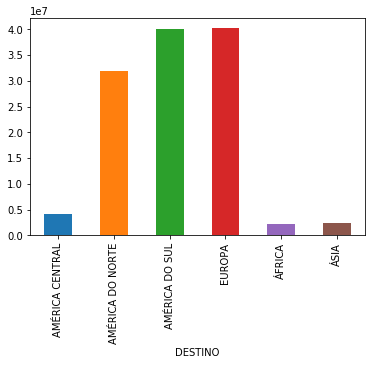

In [5]:
df.groupby(['DESTINO'])['PASSAGEIROS'].sum().plot(kind='bar')

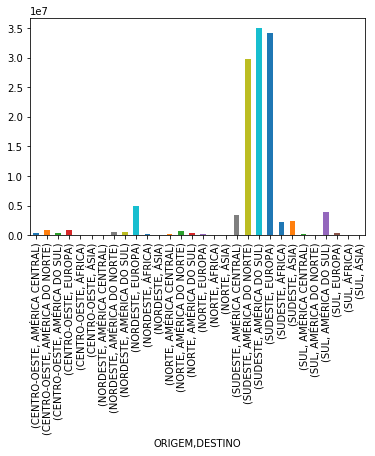

In [6]:
df.groupby(['ORIGEM', 'DESTINO'])['PASSAGEIROS'].sum().plot(kind='bar')

#### Gerando Dummies
Convertendo as colunas de texto em representação numérica

In [7]:
df_transformed = pd.get_dummies(df)
df_transformed.head()

,ANO,MES,PASSAGEIROS,ORIGEM_CENTRO-OESTE,ORIGEM_NORDESTE,ORIGEM_NORTE,ORIGEM_SUDESTE,ORIGEM_SUL,DESTINO_AMÉRICA CENTRAL,DESTINO_AMÉRICA DO NORTE,DESTINO_AMÉRICA DO SUL,DESTINO_EUROPA,DESTINO_ÁFRICA,DESTINO_ÁSIA
0,2014,3,1317.0,1,0,0,0,0,0,0,1,0,0,0
1,2014,6,0.0,0,0,0,0,1,0,0,0,0,1,0
2,2015,2,29984.0,0,0,0,0,1,0,0,1,0,0,0
3,2007,1,17340.0,0,0,0,0,1,0,0,1,0,0,0
4,2002,10,0.0,1,0,0,0,0,0,0,1,0,0,0


#### Dividindo a massa de teste e realizando a normalização

In [8]:
X = df_transformed.drop(columns=['PASSAGEIROS'])
y = df_transformed['PASSAGEIROS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

processor = StandardScaler()
X_train_scaled = processor.fit_transform(X_train)
X_test_scaled = processor.transform(X_test)

#### Treinar Regressão

In [ ]:
from regression import Regression

regression = Regression()
regression.estimate(X_train_scaled, X_test_scaled, y_train, y_test)

print("score {}".format(regression.best_score))

#### Treinar Suport Vector Regression

In [ ]:
from sgd_regression import SGDRegression

sgd_regression = SGDRegression()
sgd_regression.estimate(X_train_scaled, X_test_scaled, y_train, y_test)

print("score {}".format(sgd_regression.best_score))

#### Treinar Linear Support Vector Regression

In [ ]:
from linear_svr_regression import LinearSVRRegression

linear_svr = LinearSVRRegression()
linear_svr.estimate(X_train_scaled, X_test_scaled, y_train, y_test)

print("score {}".format(linear_svr.best_score))

#### Estimativa Regressão

In [ ]:
display(df[(df['ANO'] == 2017) & (df['MES'] == 1) & (df['ORIGEM'] == 'SUDESTE') & (df['DESTINO'] == 'AMÉRICA DO NORTE')])
estimativa = array([[2017, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]])

In [ ]:
estimativa_t = processor.transform(estimativa)

In [ ]:
display(regression.best_clt.predict(estimativa_t))
display(sgd_regression.best_clt.predict(estimativa_t))
display(linear_svr.best_clt.predict(estimativa_t))

#### Neural Network

In [9]:
from nn import NN

nn = NN()
nn.baseline_model(13)
X_n = df_transformed.drop(columns=['PASSAGEIROS'])
y_n = df_transformed['PASSAGEIROS']
nn.fit(X_n, y_n, 1000, 200, 3)
nn.save_weights('pesos_inter')

Using TensorFlow backend.


Train on 5184 samples, validate on 1296 samples
Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/

Epoch 553/1000
Epoch 554/1000
Epoch 555/1000
Epoch 556/1000
Epoch 557/1000
Epoch 558/1000
Epoch 559/1000
Epoch 560/1000
Epoch 561/1000
Epoch 562/1000
Epoch 563/1000
Epoch 564/1000
Epoch 565/1000
Epoch 566/1000
Epoch 567/1000
Epoch 568/1000
Epoch 569/1000
Epoch 570/1000
Epoch 571/1000
Epoch 572/1000
Epoch 573/1000
Epoch 574/1000
Epoch 575/1000
Epoch 576/1000
Epoch 577/1000
Epoch 578/1000
Epoch 579/1000
Epoch 580/1000
Epoch 581/1000
Epoch 582/1000
Epoch 583/1000
Epoch 584/1000
Epoch 585/1000
Epoch 586/1000
Epoch 587/1000
Epoch 588/1000
Epoch 589/1000
Epoch 590/1000
Epoch 591/1000
Epoch 592/1000
Epoch 593/1000
Epoch 594/1000
Epoch 595/1000
Epoch 596/1000
Epoch 597/1000
Epoch 598/1000
Epoch 599/1000
Epoch 600/1000
Epoch 601/1000
Epoch 602/1000
Epoch 603/1000
Epoch 604/1000
Epoch 605/1000
Epoch 606/1000
Epoch 607/1000
Epoch 608/1000
Epoch 609/1000
Epoch 610/1000
Epoch 611/1000
Epoch 612/1000
Epoch 613/1000
Epoch 614/1000
Epoch 615/1000
Epoch 616/1000
Epoch 617/1000
Epoch 618/1000
Epoch 619/

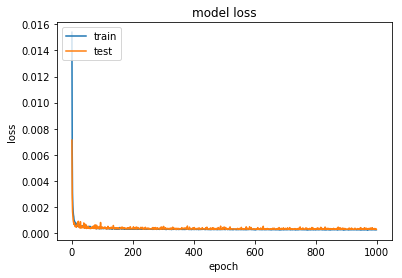

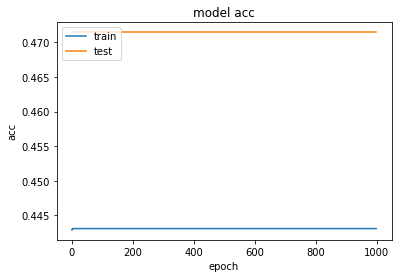

In [10]:
# summarize history for loss
pl.plot(nn.history.history['loss'])
pl.plot(nn.history.history['val_loss'])
pl.title('model loss')
pl.ylabel('loss')
pl.xlabel('epoch')
pl.legend(['train', 'test'], loc='upper left')
pl.show()

# summarize history for acc
pl.plot(nn.history.history['acc'])
pl.plot(nn.history.history['val_acc'])
pl.title('model acc')
pl.ylabel('acc')
pl.xlabel('epoch')
pl.legend(['train', 'test'], loc='upper left')
pl.show()

In [11]:
display(df[(df['ANO'] == 2017) & (df['MES'] == 1) & (df['ORIGEM'] == 'SUDESTE') & (df['DESTINO'] == 'AMÉRICA DO NORTE')])
estimativa = array([[2017, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]])
display(nn.predict(estimativa))
display(nn.predict(estimativa) / 227235)

,ANO,MES,ORIGEM,DESTINO,PASSAGEIROS
4339,2017,1,SUDESTE,AMÉRICA DO NORTE,227235.0


array([[196590.83]], dtype=float32)

array([[0.86514326]])

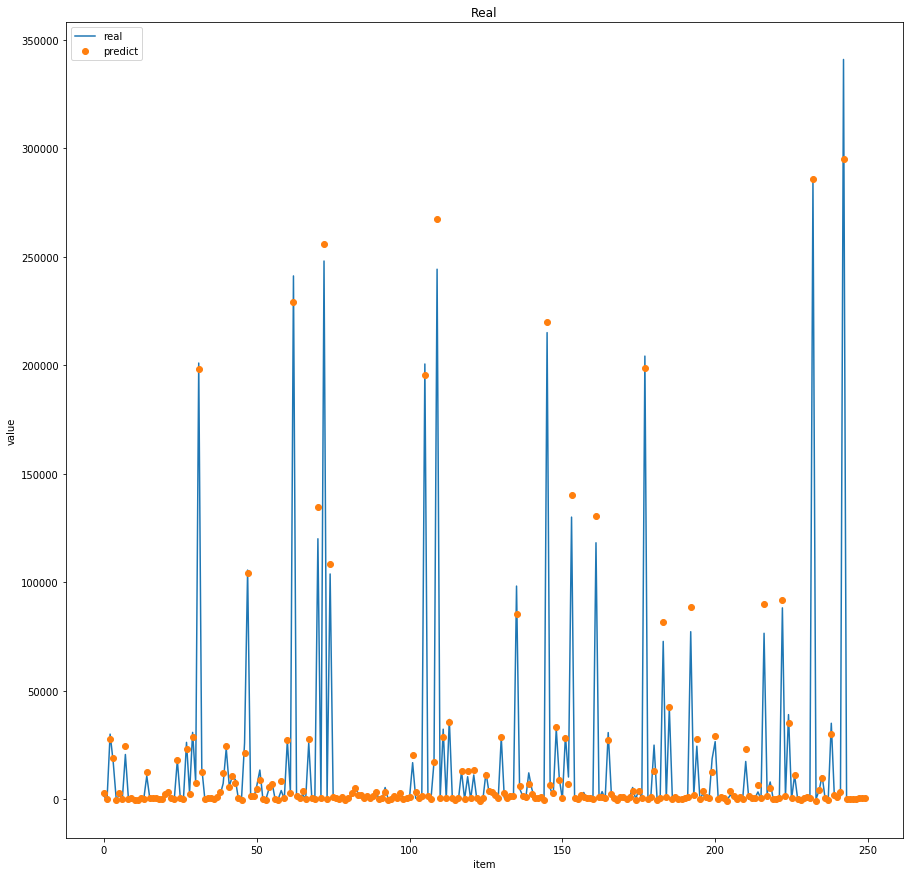

In [12]:
predict_y = nn.predict(X_n)
predict_y = [x[0] for x in predict_y]
pl.figure(figsize=(15,15))
pl.plot(y_n[:250])
pl.plot(predict_y[:250], 'o')
pl.title('Real')
pl.ylabel('value')
pl.xlabel('item')
pl.legend(['real', 'predict'], loc='upper left')
pl.show()

In [13]:
dn_predict = pd.DataFrame({}, columns=['ANO','MES','ORIGEM','DESTINO'])
for year in range(2018, 2026):
    for month in range(1, 13):
        for origin in ['SUL', 'SUDESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE']:
            for destiny in ['AMÉRICA CENTRAL', 'AMÉRICA DO NORTE', 'AMÉRICA DO SUL', 'EUROPA', 'ÁFRICA', 'ÁSIA']:
                dn_predict = dn_predict.append({ 'ANO': year, 'MES': month, 'ORIGEM': origin, 'DESTINO': destiny }, ignore_index=True)
dn_predict['ANO'] = dn_predict['ANO'].astype('int64')
dn_predict['MES'] = dn_predict['MES'].astype('int64')
dn_predict_d = pd.get_dummies(dn_predict)
dn_predict_d.head()

,ANO,MES,ORIGEM_CENTRO-OESTE,ORIGEM_NORDESTE,ORIGEM_NORTE,ORIGEM_SUDESTE,ORIGEM_SUL,DESTINO_AMÉRICA CENTRAL,DESTINO_AMÉRICA DO NORTE,DESTINO_AMÉRICA DO SUL,DESTINO_EUROPA,DESTINO_ÁFRICA,DESTINO_ÁSIA
0,2018,1,0,0,0,0,1,1,0,0,0,0,0
1,2018,1,0,0,0,0,1,0,1,0,0,0,0
2,2018,1,0,0,0,0,1,0,0,1,0,0,0
3,2018,1,0,0,0,0,1,0,0,0,1,0,0
4,2018,1,0,0,0,0,1,0,0,0,0,1,0


In [14]:
dn_predict['PASSAGEIROS'] = nn.predict(dn_predict_d)

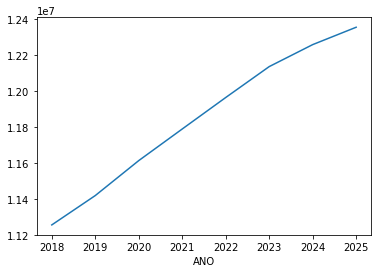

In [15]:
dn_predict.groupby(['ANO'])['PASSAGEIROS'].sum().plot()

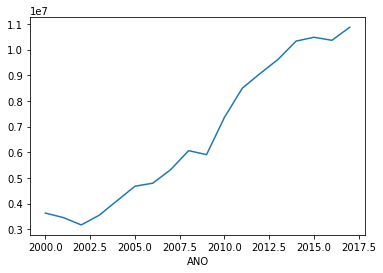

In [16]:
df.groupby(['ANO'])['PASSAGEIROS'].sum().plot()

In [17]:
dn_predict.groupby(['ANO'])['PASSAGEIROS'].sum()

ANO
2018    11256499.0
2019    11419904.0
2020    11614478.0
2021    11790354.0
2022    11965560.0
2023    12137567.0
2024    12259932.0
2025    12356624.0
Name: PASSAGEIROS, dtype: float32

In [18]:
df.groupby(['ANO'])['PASSAGEIROS'].sum()

ANO
2000     3631714.0
2001     3456384.0
2002     3170745.0
2003     3546528.0
2004     4112529.0
2005     4677338.0
2006     4796853.0
2007     5325787.0
2008     6064441.0
2009     5908729.0
2010     7360267.0
2011     8498918.0
2012     9072202.0
2013     9623286.0
2014    10330826.0
2015    10480650.0
2016    10362312.0
2017    10871037.0
Name: PASSAGEIROS, dtype: float64

In [20]:
11256499.0 / 10871037.0 #2018

1.0354577028851986